In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from plot_functions import *
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
n_splits = 10
import sys
case=2
a=2
cost='abs'

In [4]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [7]:
df[['area','total_occupants','num_rooms']].max()

area               2300.0
total_occupants       3.0
num_rooms             7.0
dtype: float64

In [8]:
au_df, au_dfc = create_matrix_single_region("Austin", year)
au_tensor = get_tensor(au_df, au_dfc)
static_au = au_df[['area','total_occupants','num_rooms']].copy()
static_au['area'] = static_au['area'].div(4000)
static_au['total_occupants'] = static_au['total_occupants'].div(8)
static_au['num_rooms'] = static_au['num_rooms'].div(8)
static_au = static_au.values


In [9]:
df, dfc = create_matrix_single_region("SanDiego", year)
tensor = get_tensor(df, dfc)
static_sd = df[['area','total_occupants','num_rooms']].copy()
static_sd['area'] = static_sd['area'].div(4000)
static_sd['total_occupants'] = static_sd['total_occupants'].div(8)
static_sd['num_rooms'] = static_sd['num_rooms'].div(8)
static_sd = static_sd.values


In [10]:
from sklearn.model_selection import train_test_split, KFold

In [11]:
n_splits = 10


In [12]:
from common import compute_rmse

In [37]:
pred = {}
sd = {}
out = {}
n_splits = 10
NUM_RANDOM = 3
TRAIN_SPLITS = range(10, 110, 40)
case = 2
num_home = 5
n_iter=1000

cost = 'l21'
algo = 'adagrad'
for cost in ['l21','l12']:
    out[cost] = {}
    for static_fac in ['static',None]:
        if static_fac is None:
            H_known_Au = None
            H_known_Sd = None
        else:
            H_known_Au = static_au
            H_known_Sd = static_sd
        np.random.seed(0)
        out[cost][static_fac] = {}
        #for lam in [1e-2, 100]:
        for lam in [1e-3, 1e-2, 1e-1, 0, 1]:
            print(cost, static_fac, lam)
            for a in range(2, 3):
                if static_fac is not None:
                    H_au, A_au, T_au, Hs, As, Ts, HATs, costs = learn_HAT_adagrad(case, au_tensor, num_home, a, num_iter=n_iter, lr=1, dis=False, cost_function=cost, H_known=H_known_Au, penalty_coeff=lam)
                else:
                    H_au, A_au, T_au, Hs, As, Ts, HATs, costs = learn_HAT_adagrad(case, au_tensor, num_home, a, num_iter=n_iter, lr=1, dis=False, cost_function=cost, penalty_coeff=lam)


                if static_fac is not None:
                    H, A, T, Hs, As, Ts, HATs, costs = learn_HAT_adagrad(case, tensor.copy(), num_home, a, num_iter=n_iter, lr=1, dis=False, cost_function=cost, A_known=A_au, H_known=H_known_Sd,penalty_coeff=lam)
                else:
                    H, A, T, Hs, As, Ts, HATs, costs = learn_HAT_adagrad(case, tensor.copy(), num_home, a, num_iter=n_iter, lr=1, dis=False, cost_function=cost, A_known=A_au, penalty_coeff=lam)

                assert(np.allclose(A, A_au))
                HAT = multiply_case(H, A, T, case)
                out[cost][static_fac][lam] = A


('l21', 'static', 0.001)
('l21', 'static', 0.01)
('l21', 'static', 0.1)
('l21', 'static', 0)
('l21', 'static', 1)
('l21', None, 0.001)
('l21', None, 0.01)
('l21', None, 0.1)
('l21', None, 0)
('l21', None, 1)
('l12', 'static', 0.001)
('l12', 'static', 0.01)
('l12', 'static', 0.1)
('l12', 'static', 0)
('l12', 'static', 1)
('l12', None, 0.001)
('l12', None, 0.01)
('l12', None, 0.1)
('l12', None, 0)
('l12', None, 1)


('l21', 0, 0)
('l21', 1, 0.001)
('l21', 2, 0.01)
('l21', 3, 0.1)
('l21', 4, 1)
('l21', 0, 0)
('l21', 1, 0.001)
('l21', 2, 0.01)
('l21', 3, 0.1)
('l21', 4, 1)
('l12', 0, 0)
('l12', 1, 0.001)
('l12', 2, 0.01)
('l12', 3, 0.1)
('l12', 4, 1)
('l12', 0, 0)
('l12', 1, 0.001)
('l12', 2, 0.01)
('l12', 3, 0.1)
('l12', 4, 1)


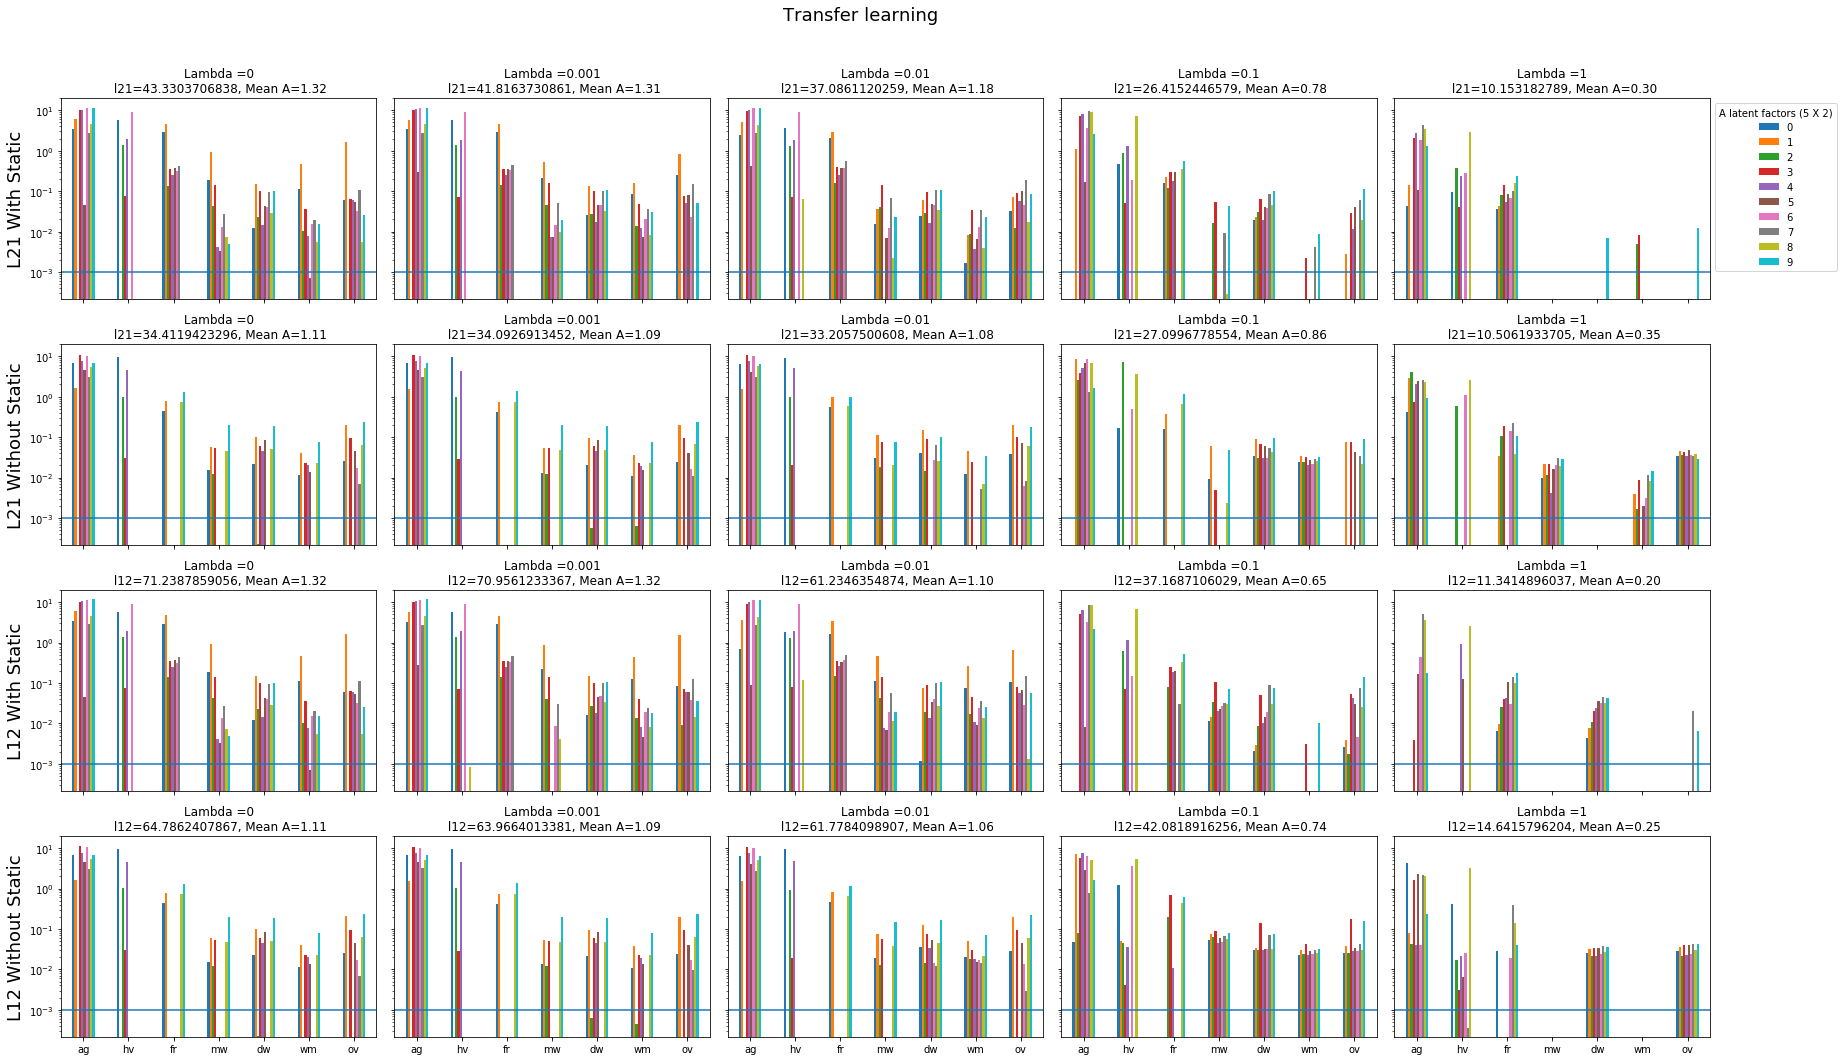

In [47]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(24, 14), sharey=True, sharex=True)
for i, cost in enumerate(['l21','l12']):
    for row, static_fac in enumerate(['static',None]):
        for col, lam in enumerate([0, 1e-3, 1e-2, 1e-1, 1]):
            print(cost, col, lam)
            A = out[cost][static_fac][lam]
            A[A<1e-7] = 0
            A_shape = A.shape
            A_flat = A.reshape(A_shape[0], A_shape[1]*A_shape[2])
            if cost=="l21":
                l1 = 0.
                for j in range(A_shape[0]):
                    l1 = l1 + np.sqrt(np.square(A_flat[j,:]).sum())
            else:
                l1 = 0.
                for j in range(A_shape[1]*A_shape[2]):
                    l1 = l1 + np.sqrt(np.square(A_flat[:,j]).sum())
                
            pd.DataFrame(A.reshape(7, 10), index=[x[:2] for x in APPLIANCES_ORDER]).plot(kind='bar', rot=0, 
                                                                        ax=ax[i*2+row, col], 
                                                                        title="Lambda ={}\n {}={}, Mean A={:0.2f}".format(lam, cost,l1, np.mean(A))
                                                                       ,legend=False, logy=True)
            ax[i*2+row, col].axhline(1e-3)
        ax[0, 4].legend(title='A latent factors (5 X 2)',bbox_to_anchor=(1, 1))
ax[0, 0].set_ylabel("L21 With Static", fontsize=18)
ax[1, 0].set_ylabel("L21 Without Static", fontsize=18)
ax[2, 0].set_ylabel("L12 With Static", fontsize=18)
ax[3, 0].set_ylabel("L12 Without Static", fontsize=18)
plt.suptitle("Transfer learning", y=1.05, fontsize=18)
fig.tight_layout()
plt.savefig("/Users/nipunbatra/Desktop/transfer-factors.pdf", bbox_inches="tight")

(0, 0)
(1, 0.001)
(2, 0.01)
(3, 0.1)
(4, 1)
(0, 0)
(1, 0.001)
(2, 0.01)
(3, 0.1)
(4, 1)
(0, 0)
(1, 0.001)
(2, 0.01)
(3, 0.1)
(4, 1)
(0, 0)
(1, 0.001)
(2, 0.01)
(3, 0.1)
(4, 1)


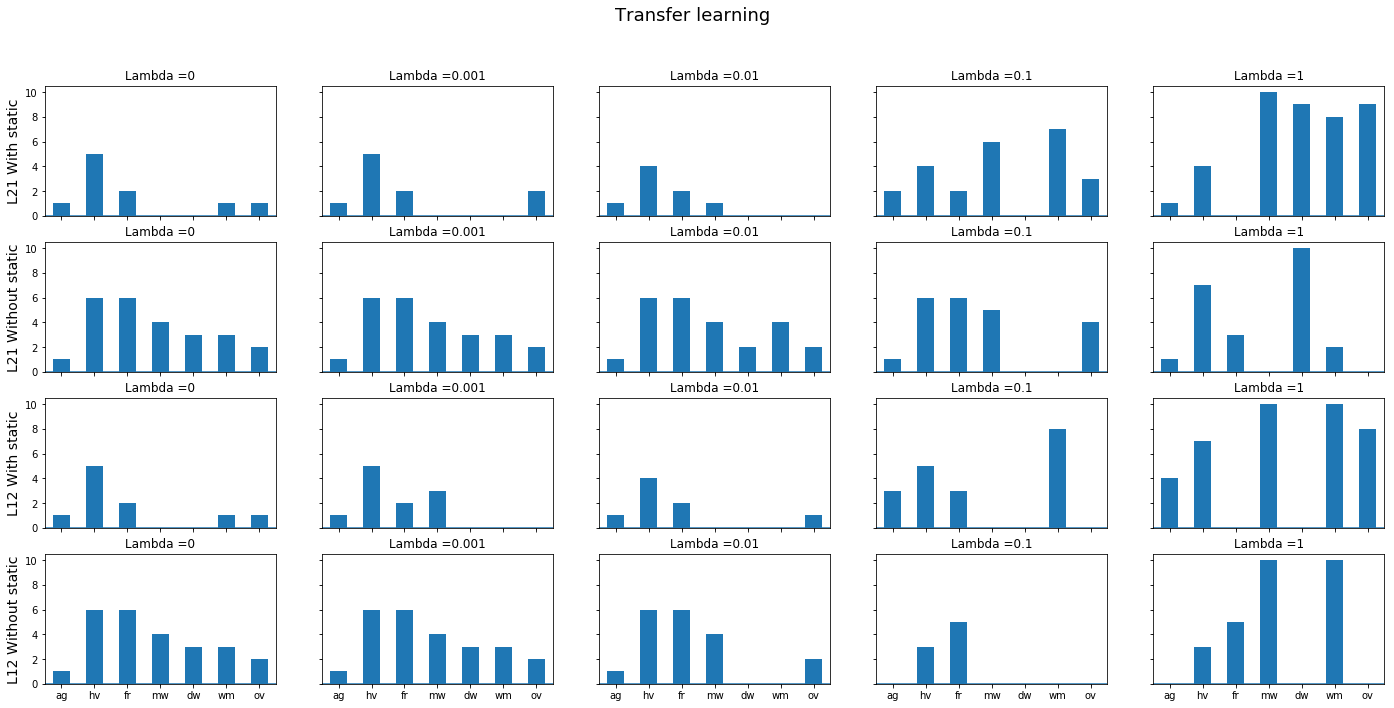

In [46]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(24, 11), sharey=True, sharex=True)
for i, cost in enumerate(['l21','l12']):

    for row, static_fac in enumerate(['static',None]):
        for col, lam in enumerate([0, 1e-3, 1e-2, 1e-1, 1,]):
            print(col, lam)
            A = out[cost][static_fac][lam]
            A[A<1e-7] = 0
            pd.Series(np.sum(A<1e-3, axis=1).sum(axis=1), index=[x[:2] for x in APPLIANCES_ORDER]).plot(kind='bar', rot=0, 
                                                                        ax=ax[i*2+row, col], 
                                                                        title="Lambda ={}".format(lam)
                                                                       ,legend=False)
            ax[i*2+row, col].axhline(1e-3)
ax[0, 0].set_ylabel("L21 With static", fontsize=14)
ax[1, 0].set_ylabel("L21 Without static", fontsize=14)
ax[2, 0].set_ylabel("L12 With static", fontsize=14)
ax[3, 0].set_ylabel("L12 Without static", fontsize=14)
plt.suptitle("Transfer learning", fontsize=18)
#ax[0].set_ylabel('# factors < 1e-3')

In [111]:
out[None].keys()

[0, 1, 0.001, 0.1, 0.01]

In [112]:
pd.DataFrame(out[None][0][2][0])

,dw,fridge,hvac,mw,oven,wm
10,1.860455,10.935846,18.856767,2.251195,2.352933,0.931564
50,1.854274,10.784018,15.459790,2.216260,2.279772,0.929652
90,1.852848,10.579758,15.530935,2.219273,2.244295,0.925171


In [113]:
import pickle
pickle.dump(out, open('predictions/transfer-sparse-static-normalised.pkl','w'))

5.94878516424
5.40495528557
5.32077769842
5.36810957007
6.06490163948


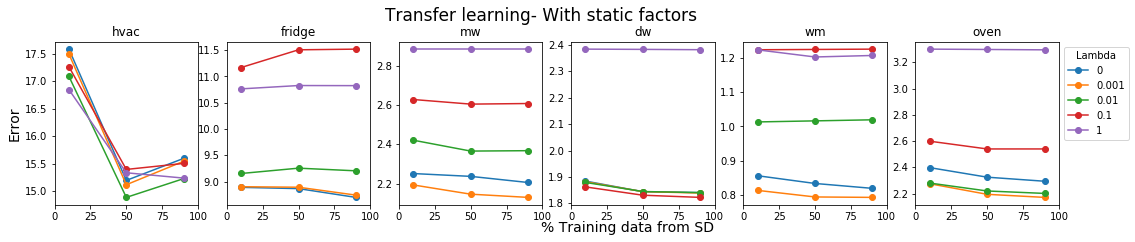

In [114]:
static_res = {}
fig, ax = plt.subplots(ncols=6, figsize=(18, 3))

for lam in [0, 1e-3, 1e-2, 1e-1, 1]:
    static_res[lam] = pd.Panel(out['static'][lam][2]).mean(axis=0)
    for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
        static_res[lam][appliance].plot(ax=ax[i], marker='o', title=appliance)
        ax[i].set_xlim((0, 100))
plt.legend([0, 1e-3, 1e-2, 1e-1, 1], bbox_to_anchor=(1, 1), title='Lambda')
fig.text(0.5, 0, "% Training data from SD", fontsize=14)
ax[0].set_ylabel("Error", fontsize=14)
plt.suptitle("Transfer learning- With static factors", fontsize=17,y=1.04)

print static_res[0.1].mean().mean()
print static_res[0.01].mean().mean()
print static_res[0.001].mean().mean()
print static_res[0.0].mean().mean()
print static_res[1].mean().mean()

5.59798547761
5.75660077884
5.78114127442
5.74000250781
5.6977433852


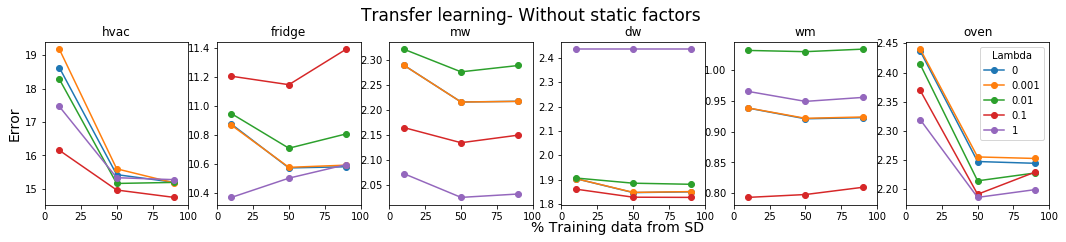

In [115]:
static_res = {}
fig, ax = plt.subplots(ncols=6, figsize=(18, 3))

for lam in [0, 1e-3, 1e-2, 1e-1, 1]:
    static_res[lam] = pd.Panel(out[None][lam][2]).mean(axis=0)
    for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
        static_res[lam][appliance].plot(ax=ax[i], marker='o', title=appliance)
        ax[i].set_xlim((0, 100))
plt.legend([0, 1e-3, 1e-2, 1e-1, 1], bbox_to_anchor=(1, 1), title='Lambda')
fig.text(0.5, 0, "% Training data from SD", fontsize=14)
ax[0].set_ylabel("Error", fontsize=14)
plt.suptitle("Transfer learning- Without static factors", fontsize=17,y=1.04)

print static_res[0.1].mean().mean()
print static_res[0.01].mean().mean()
print static_res[0.001].mean().mean()
print static_res[0.0].mean().mean()
print static_res[1].mean().mean()